## Observations and Insights 

In [29]:
%matplotlib notebook

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice in the DataFrame.
mice = merged_df["Mouse ID"].unique()

mice_count = len(mice)
mice_count

249

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(merged_df[merged_df.duplicated(['Mouse ID','Timepoint'], keep=False)]['Mouse ID'])



908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df.duplicated(['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'],keep = False, inplace = True)

In [35]:
# Checking the number of mice in the clean DataFrame.
print(len(merged_df))

1883


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
mean_numpy = np.mean('Tumor Volume (mm3)')
median_numpy = np.median('Tumor Volume (mm3)')
var_numpy = np.var('Tumor Volume (mm3)')
sd_numpy = np.std('Tumor Volume (mm3)')

print(mean_numpy)


TypeError: cannot perform reduce with flexible type

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.



TypeError: 'DataFrameGroupBy' object is not callable

## Bar Plots

<IPython.core.display.Javascript object>


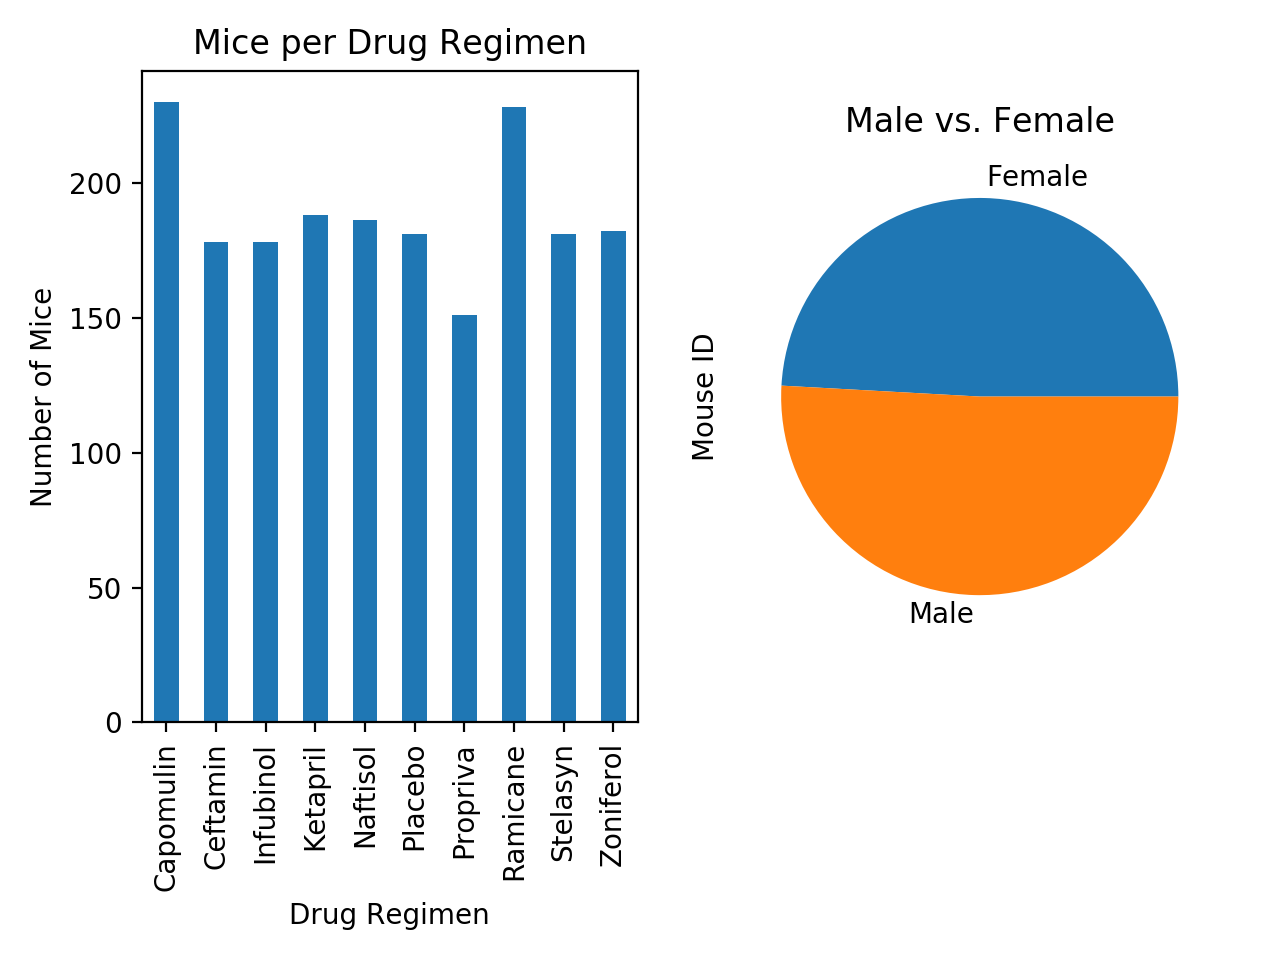

In [50]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
fig, axs = plt.subplots(1,2)

drug_groups = merged_df.groupby('Drug Regimen')

mice_per_drug_group = drug_groups['Mouse ID'].count()

chart = mice_per_drug_group.plot(kind="bar",ax=axs[0], title="Mice per Drug Regimen")

plt.show()

chart.set_xlabel("Drug Regimen")
chart.set_ylabel("Number of Mice")
plt.tight_layout()

In [46]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#y_axis = np.arange(len(merged_df))
#plt.bar(merged_df["Drug Regimen"],y_axis, color='r', alpha=0.5, align="edge")

<BarContainer object of 1883 artists>

## Pie Plots

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = merged_df.groupby('Sex')

mice_per_gender_group = gender_groups['Mouse ID'].count()

pie_chart = mice_per_gender_group.plot(kind="pie", ax=axs[1], title="Male vs. Female")

plt.show()



In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 45.0
The upper quartile of occupancy is: 56.34632118
The interquartile range of occupancy is: 11.346321179999997
Values below 27.980518230000005 could be outliers.
Values above 73.36580294999999 could be outliers.


In [55]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [56]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [57]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
